In [1]:
#Importing Libraries and Packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [3]:
#Reading in Dataframe from project github repository
url = 'https://raw.githubusercontent.com/JSchlangen9/Banana-Quality/main/banana_quality.csv'
file = requests.get(url)
string_data = StringIO(file.text)

df = pd.read_csv(string_data)

y_true = np.where(df['Quality'] == 'Good', 1, 0)

df = df.drop(['Quality'], axis=1)

df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


<Axes: >

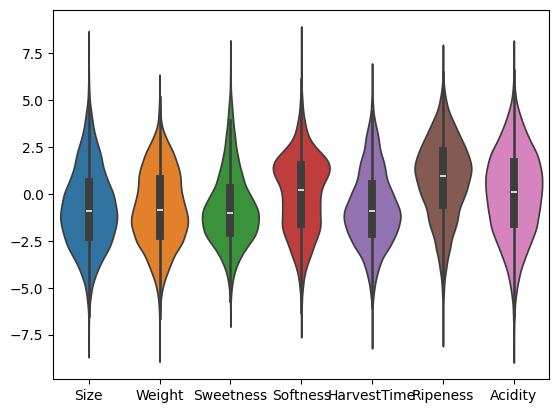

In [4]:
sns.violinplot(df)

<Axes: >

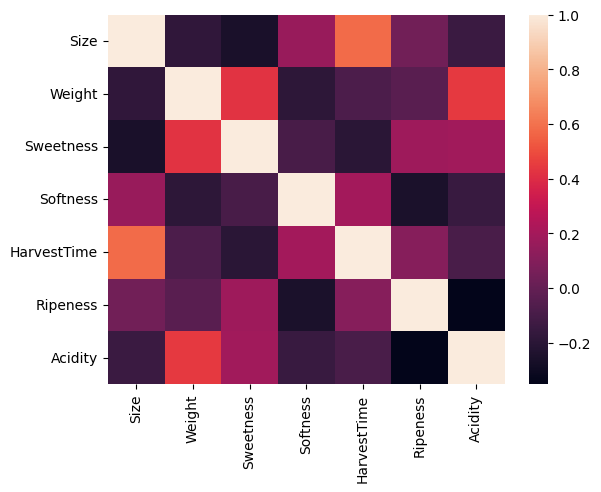

In [5]:
sns.heatmap(df.corr())

In [25]:
model = KMeans(n_clusters=2)
model.fit(df)

predictions = model.predict(df)

accuracy_score(predictions, y_true)


0.47525